In [ ]:
"""Template for jupyter notebooks created within this directory. Adds the parent directory to path and sets autoreload."""

In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import os
import sys

# Get the current working directory
cwd = os.getcwd()

# Get the parent directory
parent_dir = os.path.dirname(cwd)

# Get the grandparent directory (two levels above)
root_dir = os.path.dirname(parent_dir)

# Add the root directory to sys.path
if root_dir not in sys.path:
    sys.path.append(root_dir)

print(f"Root directory: {root_dir} is added to sys.path")


Root directory: /Users/aag/Documents/proteinfolding is added to sys.path


In [3]:
## test imports

from proteinfolding import * ## should run without errors

##TODO: proper testing ##

In [4]:
import pandas as pd
df = pd.read_csv(os.path.join(root_dir, "notebooks/local_testing/complexity_SA_stats_convergence_4.csv"))

In [5]:
print(df.head())

   num_res  num_rot  num_qubits  ground_state  cpu_calls_mean  std_cpu_calls  \
0        2        2           4     -0.228445          361.28     346.673739   
1        2        3           6     -2.298123          975.60     765.497485   
2        2        4           8     -4.152578         6563.20    5491.799501   
3        2        5          10     -8.785525        87352.00   81533.014761   
4        2        6          12    -10.309481       391524.48  322204.662142   

   successful_runs  total_runs  convergence_ratio  
0              100         100                1.0  
1              100         100                1.0  
2              100         100                1.0  
3              100         100                1.0  
4              100         100                1.0  


In [6]:
summary = df.groupby("num_qubits").agg(
    mean_convergence_ratio=("convergence_ratio", "mean"),
    std_convergence_ratio=("convergence_ratio", "std"),
    systems_tested=("convergence_ratio", "count")
).reset_index()

print(summary)

    num_qubits  mean_convergence_ratio  std_convergence_ratio  systems_tested
0            4                1.000000                    NaN               1
1            6                1.000000               0.000000               2
2            8                1.000000               0.000000               2
3            9                1.000000                    NaN               1
4           10                1.000000               0.000000               2
5           12                1.000000               0.000000               4
6           14                1.000000               0.000000               2
7           15                1.000000               0.000000               2
8           16                1.000000               0.000000               2
9           18                1.000000               0.000000               4
10          20                0.997500               0.005000               4
11          21                0.985000               0.021213   

In [7]:
summary.to_csv(os.path.join(root_dir, "notebooks/local_testing/success_ratio_SA.csv"), index=False)

In [12]:
import pickle

with open("cpu_calls_per_config.pkl", "rb") as f:
    all_cpu_calls = pickle.load(f)

# Check what's inside
for key, calls in all_cpu_calls.items():
    print(key, type(calls), calls[:3])
    break  # just to confirm format


(10, 2) <class 'list'> [2434000, 3011600, 1017600]


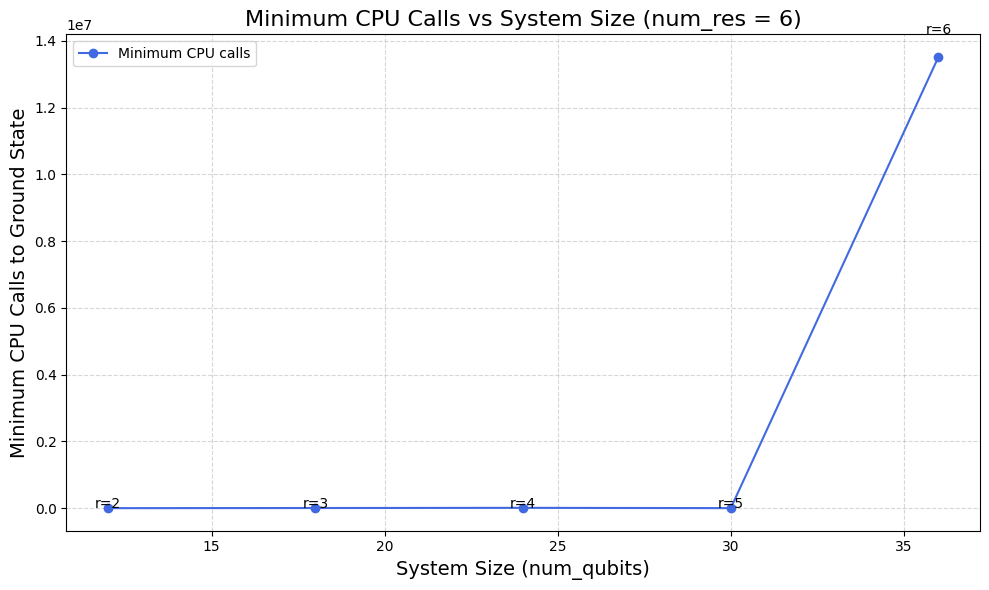

In [13]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the actual per-run CPU call data (dict)
with open("cpu_calls_per_config.pkl", "rb") as f:
    all_cpu_calls = pickle.load(f)

# Prepare data for num_res = 6
data = []
for (num_res, num_rot), calls in all_cpu_calls.items():
    if num_res == 6:
        successful_calls = [c for c in calls if not np.isnan(c)]
        if successful_calls:
            num_qubits = num_res * num_rot
            min_calls = min(successful_calls)
            data.append((num_qubits, num_rot, min_calls))

# Create DataFrame
df_min_shots = pd.DataFrame(data, columns=["num_qubits", "num_rot", "min_cpu_calls"])

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df_min_shots["num_qubits"], df_min_shots["min_cpu_calls"], marker="o", linestyle="-", color="royalblue", label="Minimum CPU calls")

for _, row in df_min_shots.iterrows():
    plt.text(row["num_qubits"], row["min_cpu_calls"] * 1.05, f"r={row['num_rot']}", ha="center", fontsize=10)

plt.xlabel("System Size (num_qubits)", fontsize=14)
plt.ylabel("Minimum CPU Calls to Ground State", fontsize=14)
plt.title("Minimum CPU Calls vs System Size (num_res = 6)", fontsize=16)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.legend()
plt.show()


In [4]:
from proteinfolding.paths import EXACT_DATA_ENERGY_BITSTRING_FILE
from proteinfolding.data_processing import find_min_energy_and_bitstring_from_exact_energy_dataframe
import pandas as pd

exact_data = pd.read_csv(EXACT_DATA_ENERGY_BITSTRING_FILE, compression='gzip')

df_filtered = exact_data[(exact_data['num_res'] == num_res) & (exact_data['num_rot'] == num_rot)]
if df_filtered.empty:
    raise Exception(f"No matching rows found for num_res = {num_res} and num_rot = {num_rot}")

# Instead of raising an error, select the row with the minimum energy
df_filtered = df_filtered.sort_values(by='energies').head(1)

min_energy, min_energy_bitstring = find_min_energy_and_bitstring_from_exact_energy_dataframe(exact_data, num_res, num_rot)
print(min_energy)

/Users/aag/Documents/proteinfolding/notebooks/local_testing
┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE │
│         See LICENSE.PyRosetta.md or email license@uw.edu for details         │
└──────────────────────────────────────────────────────────────────────────────┘
PyRosetta-4 2025 [Rosetta PyRosetta4.Release.python310.m1 2025.06+release.029c6a159b896477003a14f78f472d4cd2cead46 2025-02-04T15:14:13] retrieved from: http://www.pyrosetta.org
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.Release.pyt

NameError: name 'num_res' is not defined

In [ ]:
# import pandas as pd
# from proteinfolding.paths import EXACT_DATA_DIR, EXACT_DATA_ENERGY_BITSTRING_FILE


# df = pd.read_csv('/Users/aag/Documents/proteinfolding/data/processed/exact/exact_ground_state_and_energy.csv')
# print(df)

# # df.to_csv(
# #     str(EXACT_DATA_ENERGY_BITSTRING_FILE), 
# #     index=False, 
# #     compression="gzip", 
# #     mode="w",  # Overwrite the existing file
#     header=True 
# )



     LSFJOBID  num_res  num_rot   gs_energy  \
0           0        2        2   -0.228445   
1           0        2        3   -2.298123   
2           0        2        4   -4.152578   
3           0        2        5   -8.785525   
4           0        2        6  -10.309481   
..        ...      ...      ...         ...   
165         0       10        2   -9.757993   
166         0       10        3  -45.022370   
167         0       10        4  -95.630971   
168         0       10        5 -574.548316   
169  15242294       10        6 -727.570003   

                                          gs_bitstring  
0                                                 0101  
1                                               010010  
2                                             00010100  
3                                           0001000001  
4                                         000001000010  
..                                                 ...  
165                               01

In [13]:
from proteinfolding.supporting_functions import get_ground_state_SA

num_res_array = [5]
num_rot_array = [11, 12]

df_results = get_ground_state_SA(num_rot_array, num_res_array)


/Users/aag/Documents/proteinfolding/notebooks/local_testing
114   -160.19677
Name: gs_energy, dtype: float64
files already present, not generating

⚠️ WARNING: Ground state NOT found after 100 restarts.
Optimisation completed.
Global minimum with SA:  -157.63584544183686
Parameters at minimum:  [0.457431   0.27062033 0.04685886 0.36858574 0.28867037 0.40097699
 0.09797535 0.71989073 0.79780635 0.81796149 0.21038987 0.35661899
 0.12287908 0.5848074  0.53210685 0.20432507 0.71821157 0.91040726
 0.38283713 0.17237965 0.84051958 0.38835488 0.28021318 0.22388874
 0.21804981 0.29435677 0.65488502 0.0904258  0.21961392 0.78758226
 0.99794429 0.14357977 0.03423609 0.25825973 0.24604487 0.60664356
 0.7455084  0.56133731 0.01076338 0.20462612 0.36414087 0.73603676
 0.78324734 0.72038928 0.03944626 0.27117538 0.37209926 0.4593566
 0.03210166 0.48415776 0.35273116 0.7695286  0.50681551 0.7470996
 0.27700002]
Total CPU calls (energy function calls): 11051396
Total evaluation time: 11052.30336699956

In [12]:
df_results.to_csv(os.path.join(root_dir, "notebooks/local_testing/complexity_SA_break_gs.csv"), index=False, mode="a", header=False)

In [330]:
import numpy as np
from proteinfolding.paths import EXACT_DATA_ENERGY_BITSTRING_FILE_ALL

# df_results = pd.read_csv(os.path.join(root_dir, "notebooks/local_testing/complexity_SA_break_gs.csv"))
# df_exact = pd.read_csv("/Users/aag/Documents/proteinfolding/data/processed/exact/exact_ground_state_and_energy.csv")

df_results = pd.read_csv(os.path.join(root_dir, "notebooks/local_testing/complexity_SA_all_int.csv"))
df_exact = pd.read_csv(EXACT_DATA_ENERGY_BITSTRING_FILE_ALL, compression='gzip')
df_exact['energies'] = df_exact['energies'].apply(eval)  # convert string to list
df_exact['min_energy'] = df_exact['energies'].apply(lambda e: float(np.min([complex(x).real for x in e])))

# Drop unnecessary columns
df_exact_min = df_exact[['num_res', 'num_rot', 'min_energy']].drop_duplicates()


# Merge on num_res and num_rot to get true ground state energy
df_merged = pd.merge(df_results, df_exact[['num_res', 'num_rot', 'energies']], on=['num_res', 'num_rot'], how='left')

# Set a tolerance
tol = 1e-6

# Identify mismatched rows
mask_mismatch = ~np.isclose(df_merged["ground_state"], df_merged["min_energy"], atol=tol)
df_mismatches = df_merged[mask_mismatch]

# Report mismatches
print("❌ Mismatches found:")
print(df_mismatches[["num_res", "num_rot", "ground_state", "gs_energy"]])

# Drop mismatches
df_cleaned = df_results[~mask_mismatch]

# Save cleaned version (optional)
# df_cleaned.to_csv("complexity_SA_cleaned.csv", index=False)


KeyError: 'min_energy'

In [367]:
df_sa = pd.read_csv(os.path.join(root_dir, "notebooks/local_testing/complexity_SA_break_gs.csv"))
df_sa = df_sa.sort_values(
    by=['num_qubits', 'cpu_calls', 'num_res', 'num_rot'], 
    ascending=[True, True, True, True]
)
print(df_sa)

     num_res  num_rot  num_qubits  ground_state  cpu_calls
0          2        2           4     -0.228445        336
1          2        2           4     -0.228445        656
2          2        2           4     -0.228445       2144
3          3        2           6     -2.427945        108
4          3        2           6     -2.427945        216
..       ...      ...         ...           ...        ...
122        5       12          60   -178.922362  433321200
124        6       10          60   -287.075872  433980000
118        4       15          60    -34.251528  434199600
119        2       31          62     48.507809    8479864
120        3       21          63   -469.305224  501876081

[133 rows x 5 columns]


In [368]:
df_sa.to_csv(os.path.join(root_dir, "notebooks/local_testing/complexity_SA_break_gs.csv"), mode='w', header=True, index=False)

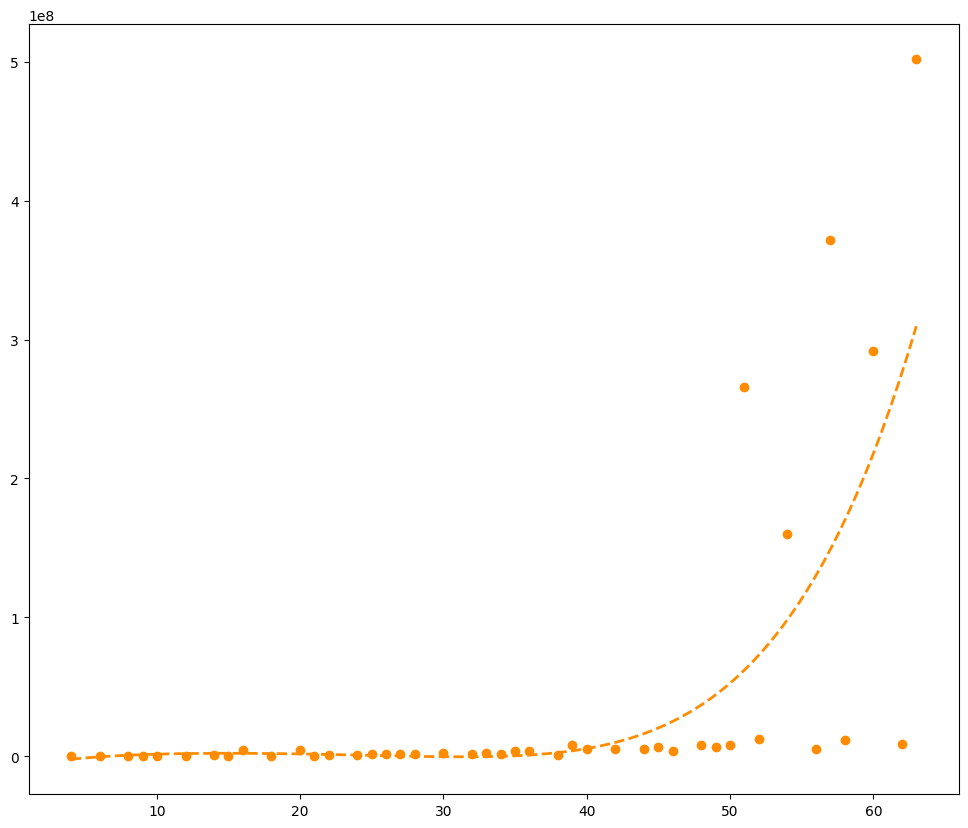

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

cpu_df = pd.read_csv("complexity_SA_break_gs.csv")


cpu_stats = cpu_df.groupby("num_qubits")["cpu_calls"].agg(["mean", "std"]).reset_index()

X_cpu = cpu_stats["num_qubits"].values
y_cpu = cpu_stats["mean"].values
num_qubits_smooth = np.linspace(X_cpu.min(), X_cpu.max(), 100)

log_x = np.log(X_cpu)
log_y = np.log(y_cpu)

# Try degree 1, 2, 3 for comparison
deg = 4
coeffs = np.polyfit(log_x, log_y, deg=deg)
poly_fit_log = np.poly1d(coeffs)


plt.figure(figsize=(12, 10))
plt.scatter(X_cpu, y_cpu, label="SA", color='darkorange')
plt.plot(num_qubits_smooth, poly_fit_log, linestyle="--", label="Poly. Fit (Deg 3)", color="darkorange", linewidth=2)


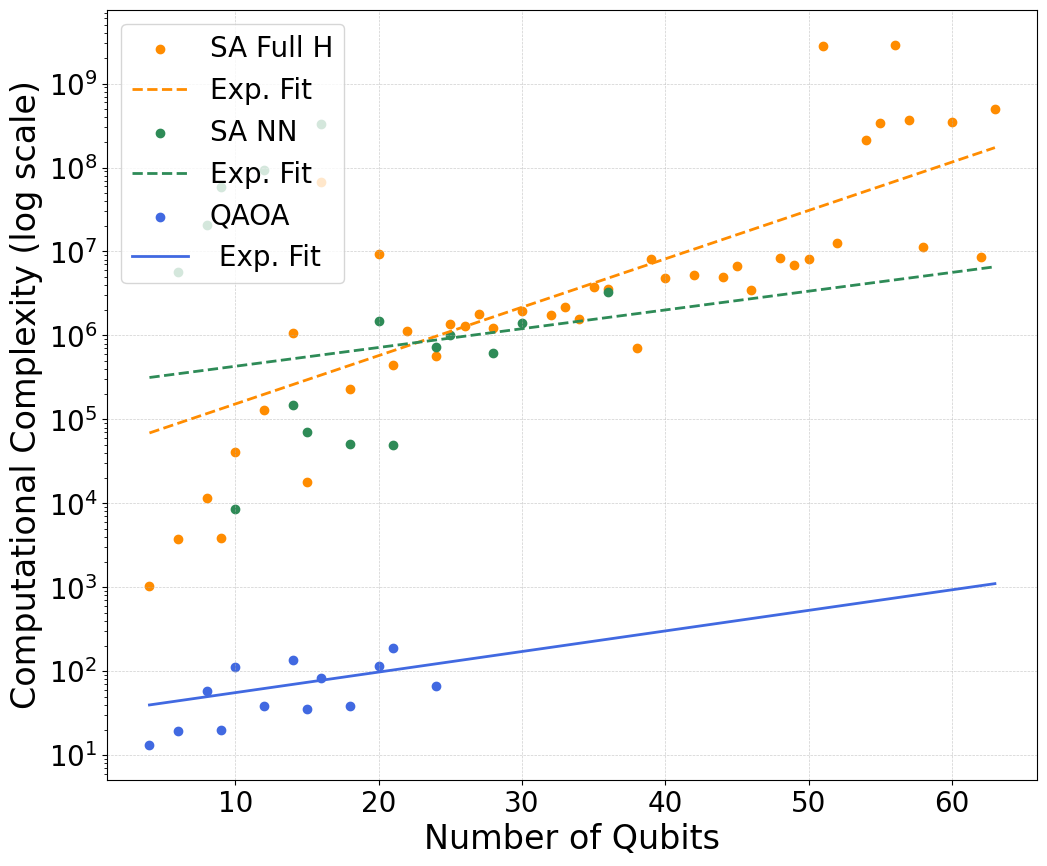

CPU Exp Fit (log-fit): a=4.053e+04, b=0.133, R²=0.5758


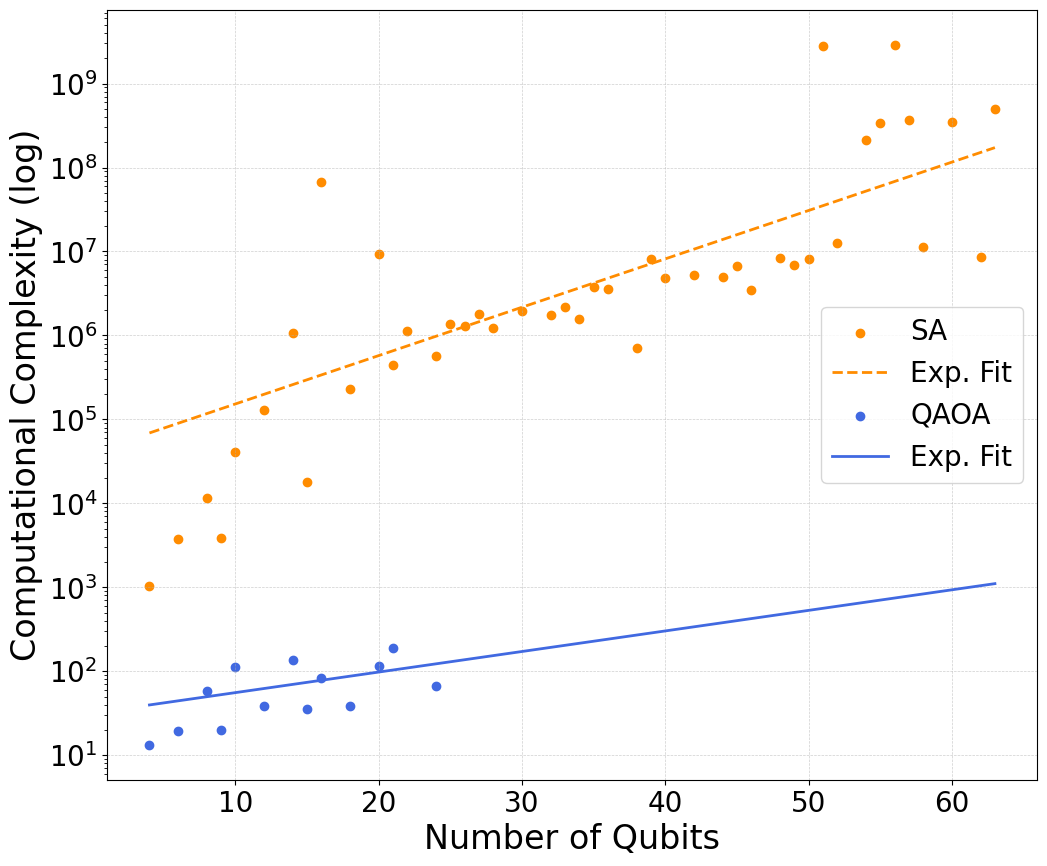

Exponential Fit: y = 4.05e+04 * exp(0.13 * x)


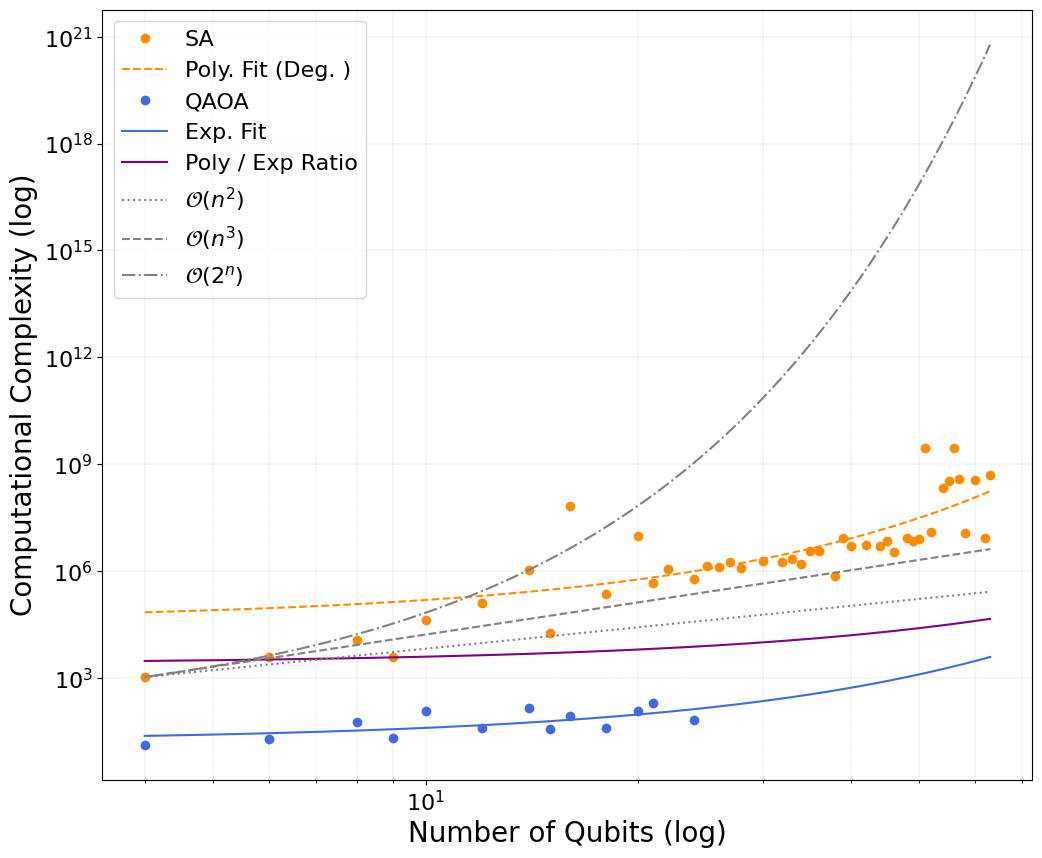

In [365]:
from proteinfolding.plotter_scaling import DataPlotter
import pandas as pd

cpu_df_1 = pd.read_csv("complexity_SA_break_gs.csv")
cpu_df_2 = pd.read_csv("complexity_SA_all_int.csv")
qpu_df = pd.read_csv("QPU_calls_trained.csv")

save_path="/Users/aag/Documents/proteinfolding/plots/xy_qaoa/cpu_vs_qpu"

plotter = DataPlotter(cpu_df_1, qpu_df)
plotter.plot_scaling_semilog_exp_fit_NN(cpu_df_alt=cpu_df_2, label_alt="CPU (Full Interaction)")
plotter.plot_scaling_semilog_exp_fit(save_path=save_path)
plotter.plot_scaling_loglog_poly_vs_exp(save_path=save_path)


Polynomial (deg=6) R² in log-log space: 0.8377


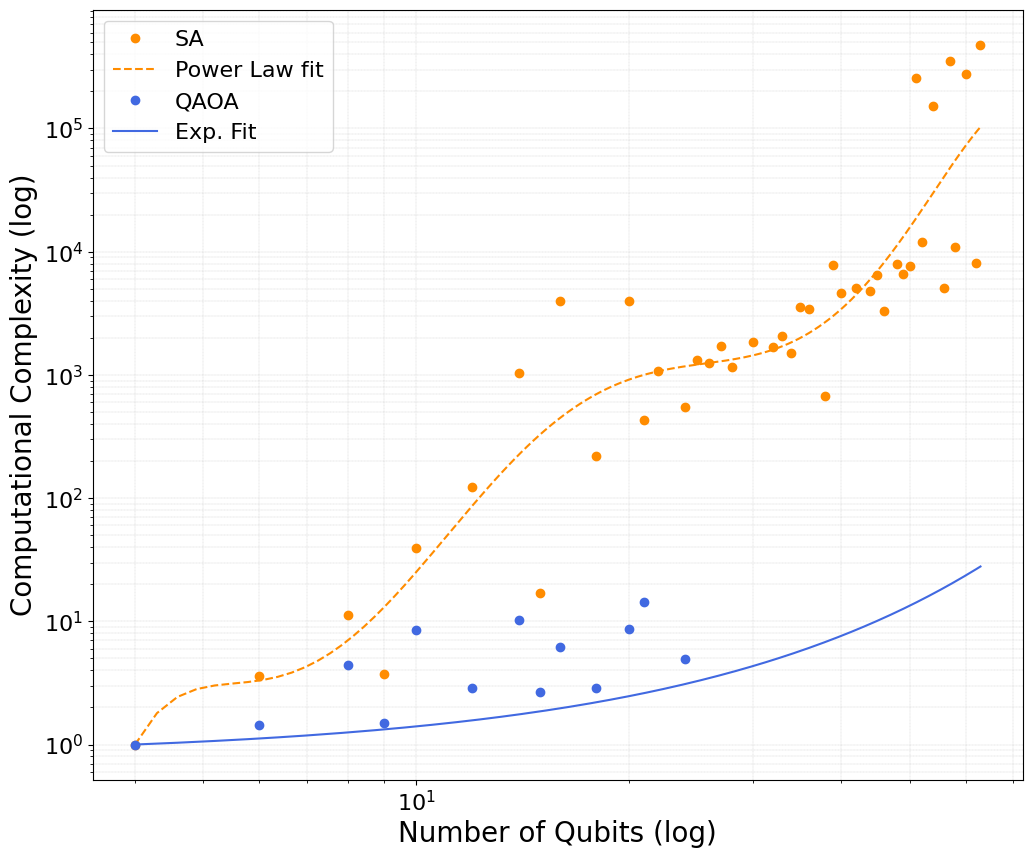

In [291]:
plotter.plot_scaling_loglog_poly_vs_exp_normalised()


Intersection at x = 138.7483, y = 1025264170442674560.0000


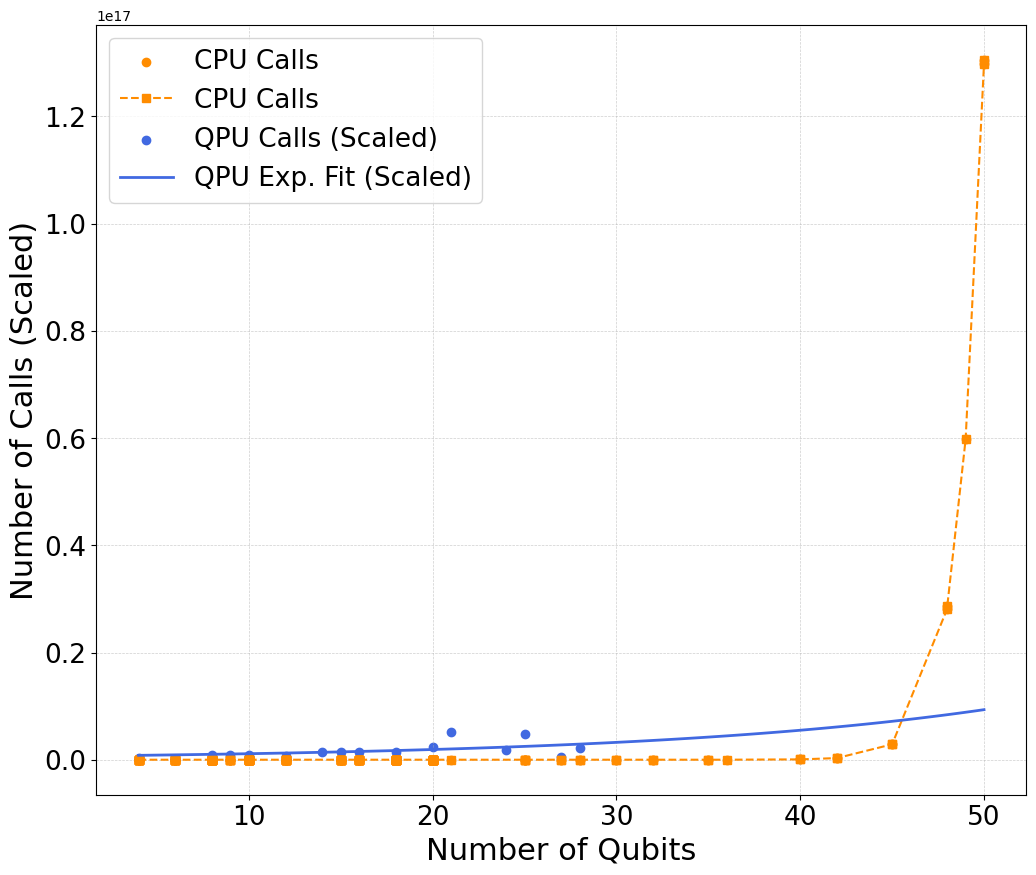

In [319]:
from proteinfolding.plotter_scaling import DataPlotter
import pandas as pd

cpu_df = pd.read_csv("complexity_SA.csv")
qpu_df = pd.read_csv("QPU_calls_cleaned.csv")

plotter = DataPlotter(cpu_df, qpu_df)
# plotter.plot_scaling_linear_exp_fit_trained()
plotter. plot_scaling_linear_exp_fit()

/Users/aag/Documents/proteinfolding/notebooks/local_testing
Intersection at x = 13.7917, y = 125.0294


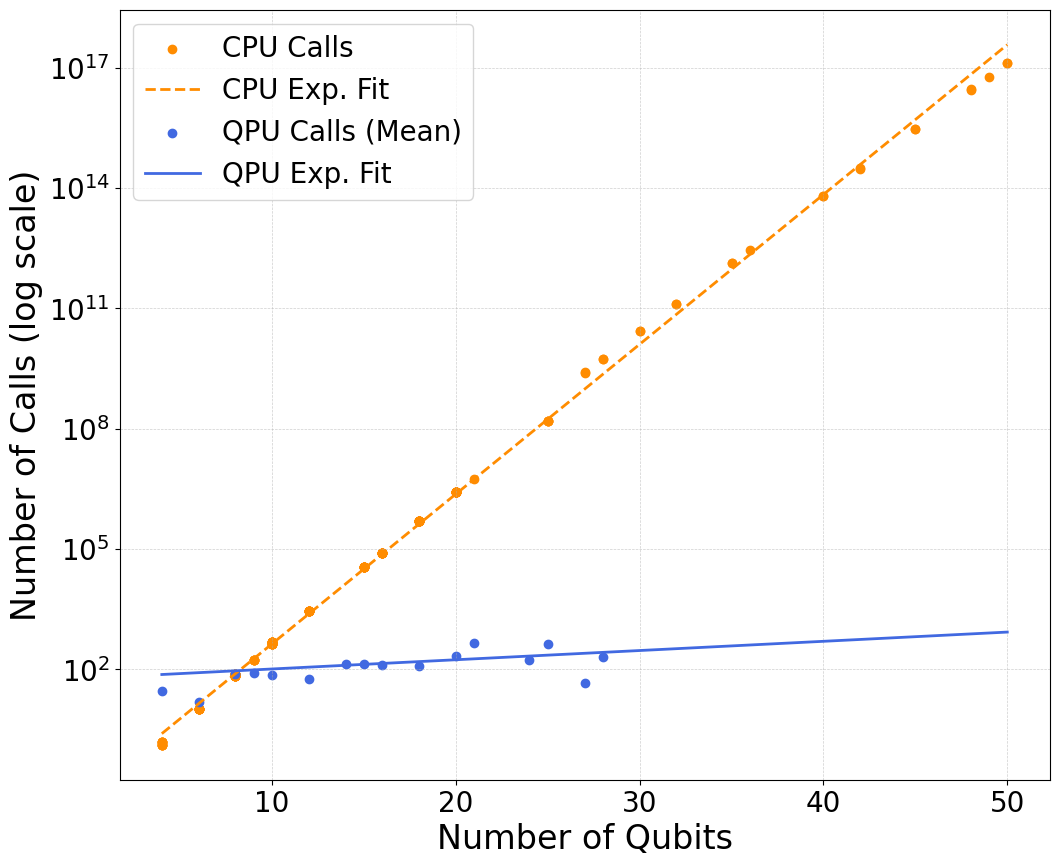

In [336]:
plotter.plot_scaling_semilog_exp_fit(save_path="/Users/aag/Documents/proteinfolding/plots/xy_qaoa/cpu_vs_qpu")

Processing p=1.0: Unique num_qubits values: [ 4  6  8  9 10 12 16 18]
Processing p=2.0: Unique num_qubits values: [ 4  6  8  9 10 12 15 16 18]
Processing p=3.0: Unique num_qubits values: [ 4  6  8 10 12 18 20 24 27]
Processing p=4.0: Unique num_qubits values: [ 8 10 15 18 20 24 28]
Processing p=5.0: Unique num_qubits values: [ 8 10 12 16 18 20]
Processing p=6.0: Unique num_qubits values: [18 20 24 25]
Processing p=7.0: Unique num_qubits values: [20 25]


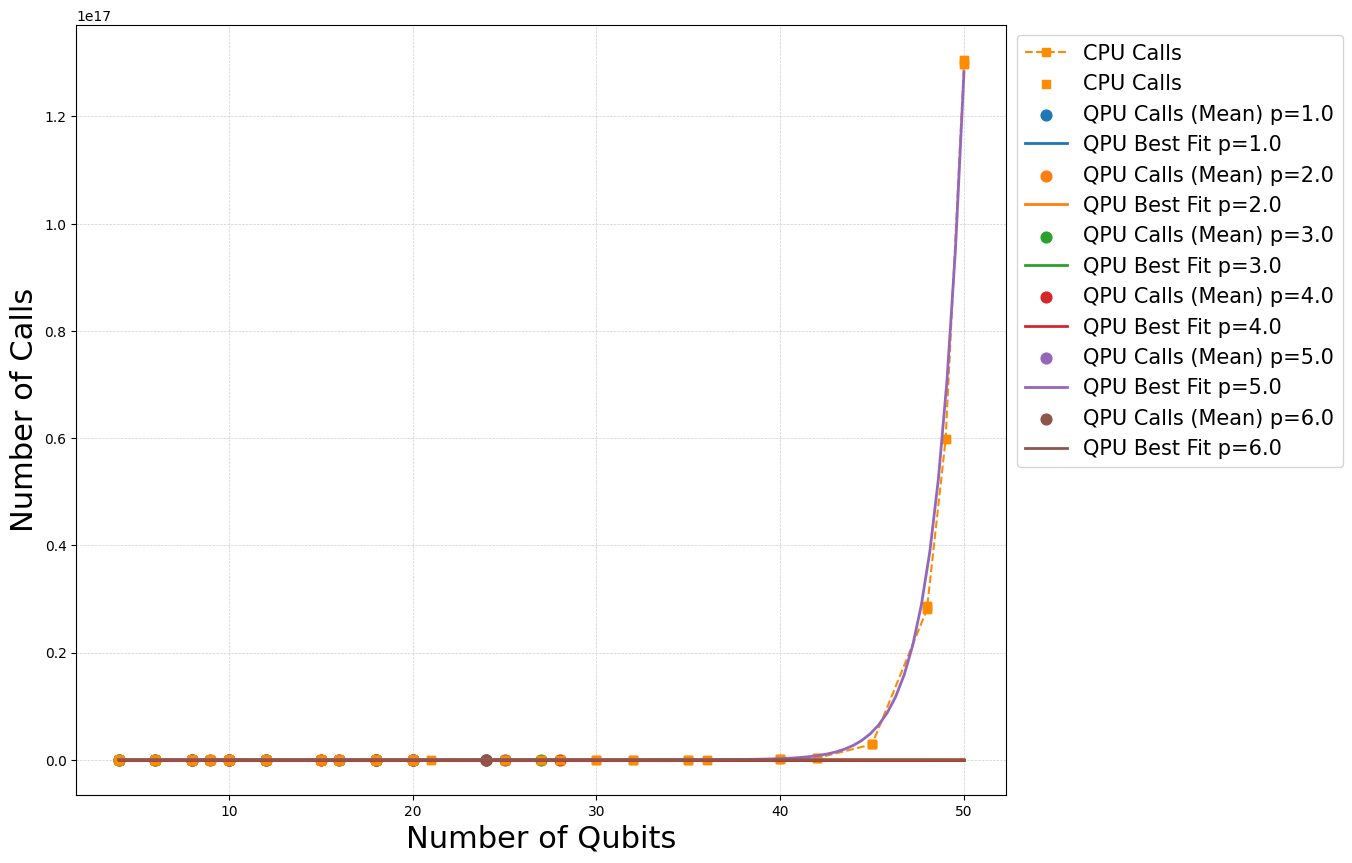

In [299]:
plotter.plot_scaling_multiple_p()

Processing p=1.0: Unique num_qubits values: [ 4  6  8  9 10 12 16 18]


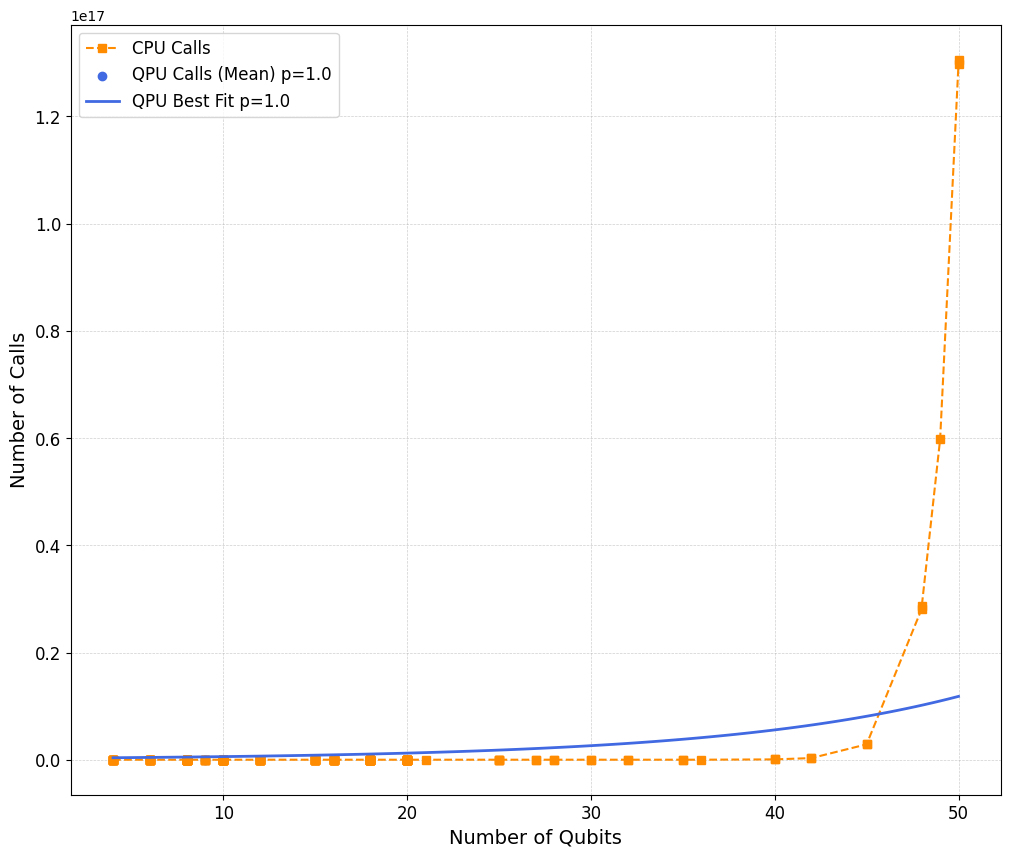

Processing p=2.0: Unique num_qubits values: [ 4  6  8  9 10 12 15 16 18]


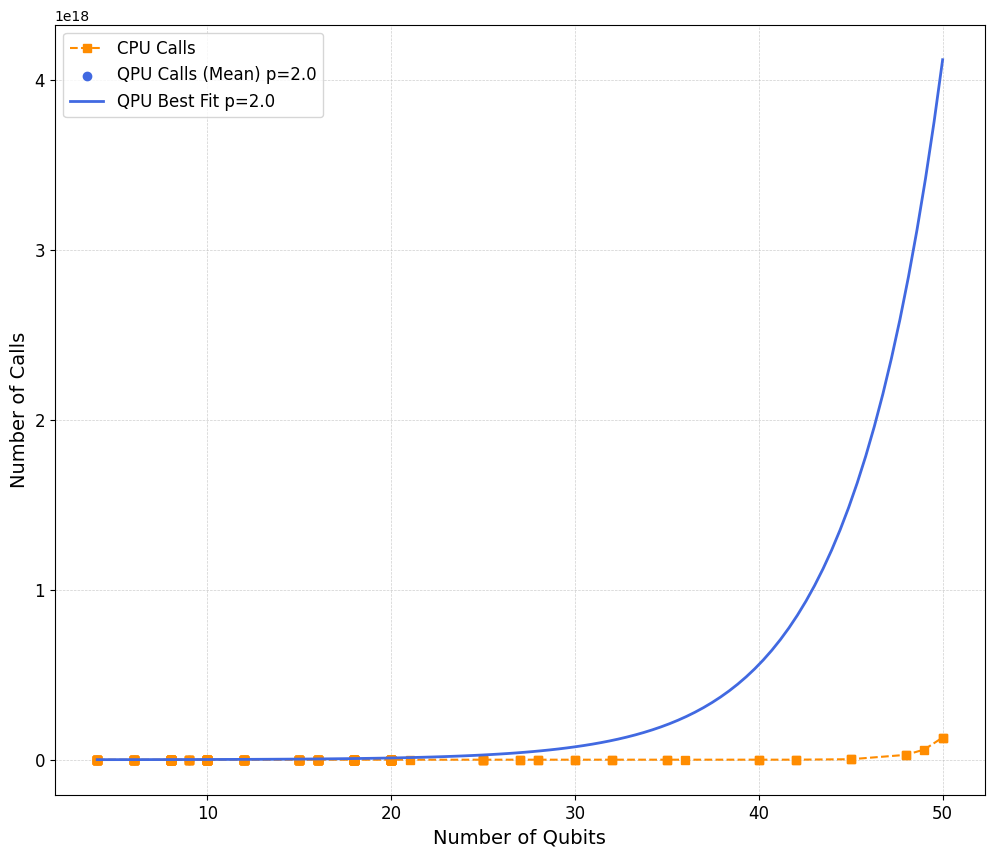

Processing p=3.0: Unique num_qubits values: [ 4  6  8 10 12 18 20 24 27]


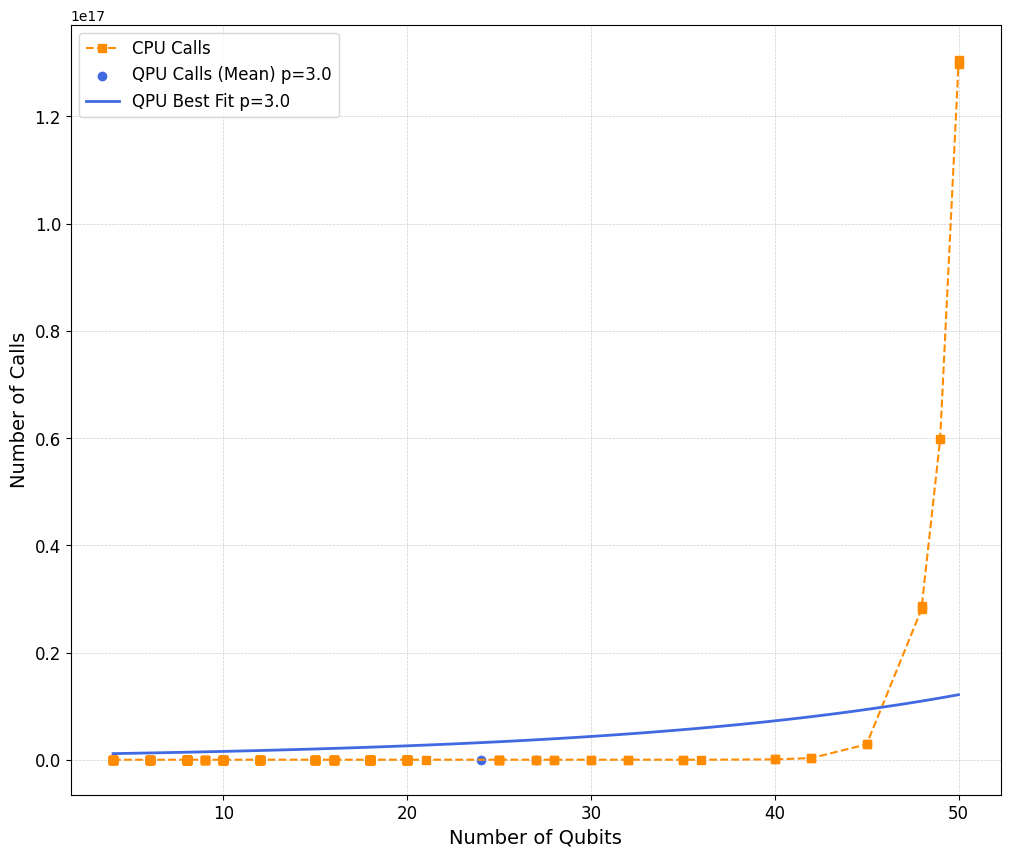

Processing p=4.0: Unique num_qubits values: [ 8 10 15 18 20 24 28]


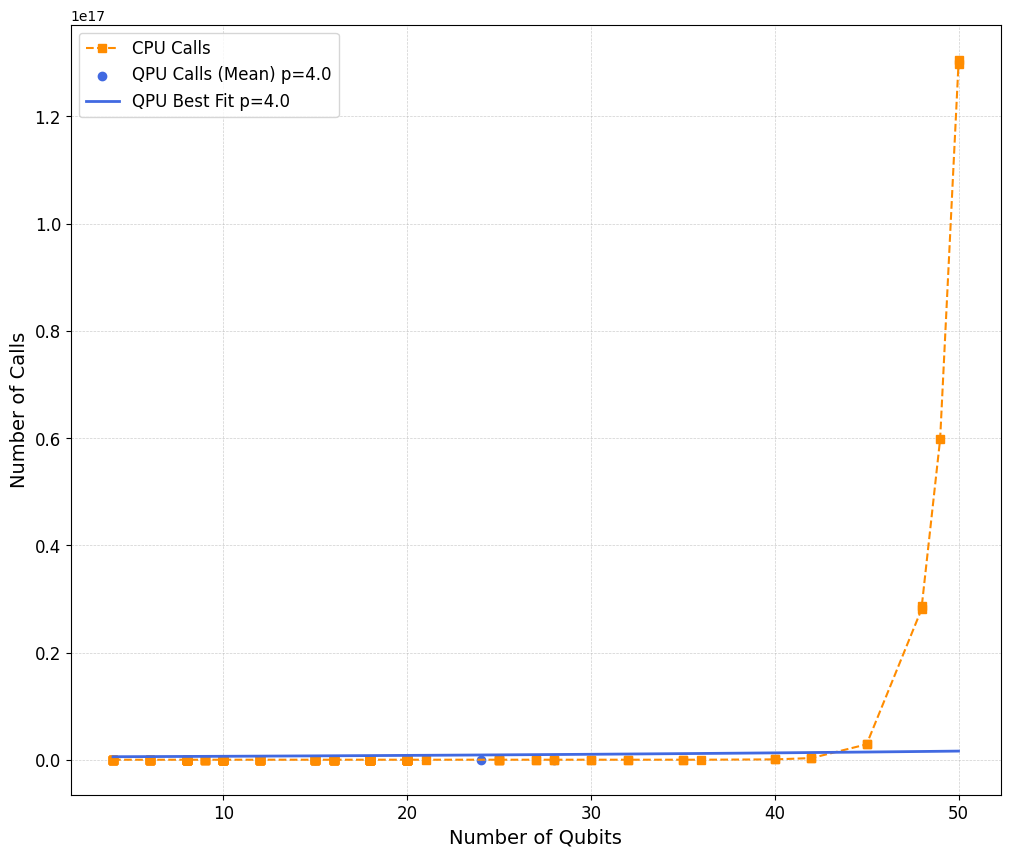

Processing p=5.0: Unique num_qubits values: [ 8 10 12 16 18 20]


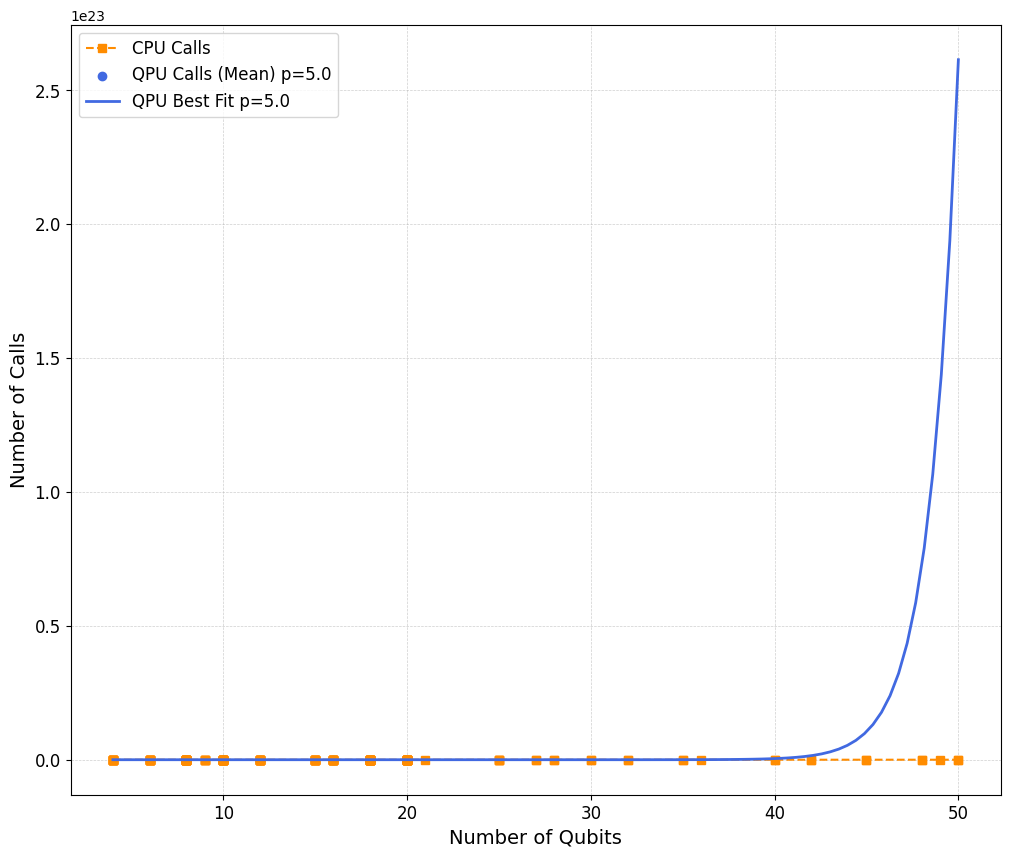

Processing p=6.0: Unique num_qubits values: [18 20 24 25]


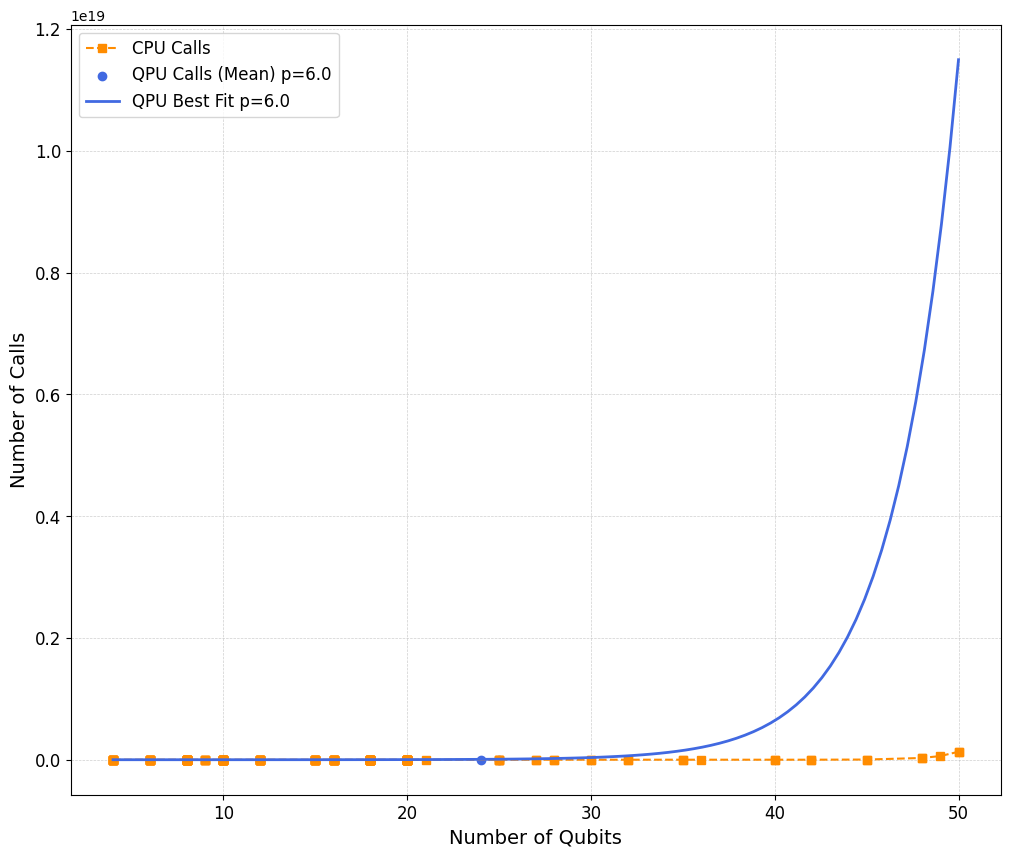

Processing p=7.0: Unique num_qubits values: [20 25]


/Users/aag/Documents/proteinfolding/proteinfolding/plotter_scaling.py:177: OptimizeWarning: Covariance of the parameters could not be estimated
  


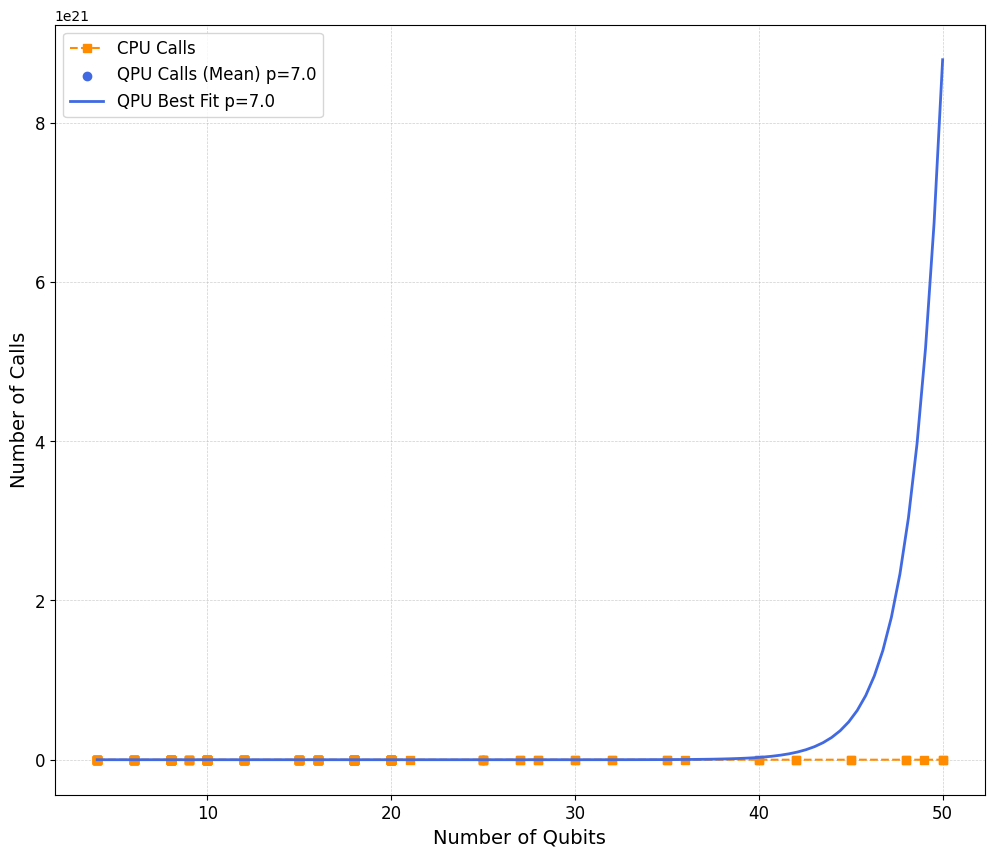

In [301]:
plotter.plot_scaling_per_p()

Processing num_rot=2.0, p=1.0: Unique num_qubits values: [ 4  6  8 10]
Processing num_rot=2.0, p=2.0: Unique num_qubits values: [ 4  6  8 10 18]
Processing num_rot=2.0, p=3.0: Unique num_qubits values: [ 4  8 10]
Processing num_rot=2.0, p=4.0: Unique num_qubits values: [ 8 10]
Processing num_rot=2.0, p=5.0: Unique num_qubits values: [ 8 10]
Processing num_rot=2.0, p=6.0: Unique num_qubits values: []
Processing num_rot=2.0, p=7.0: Unique num_qubits values: []


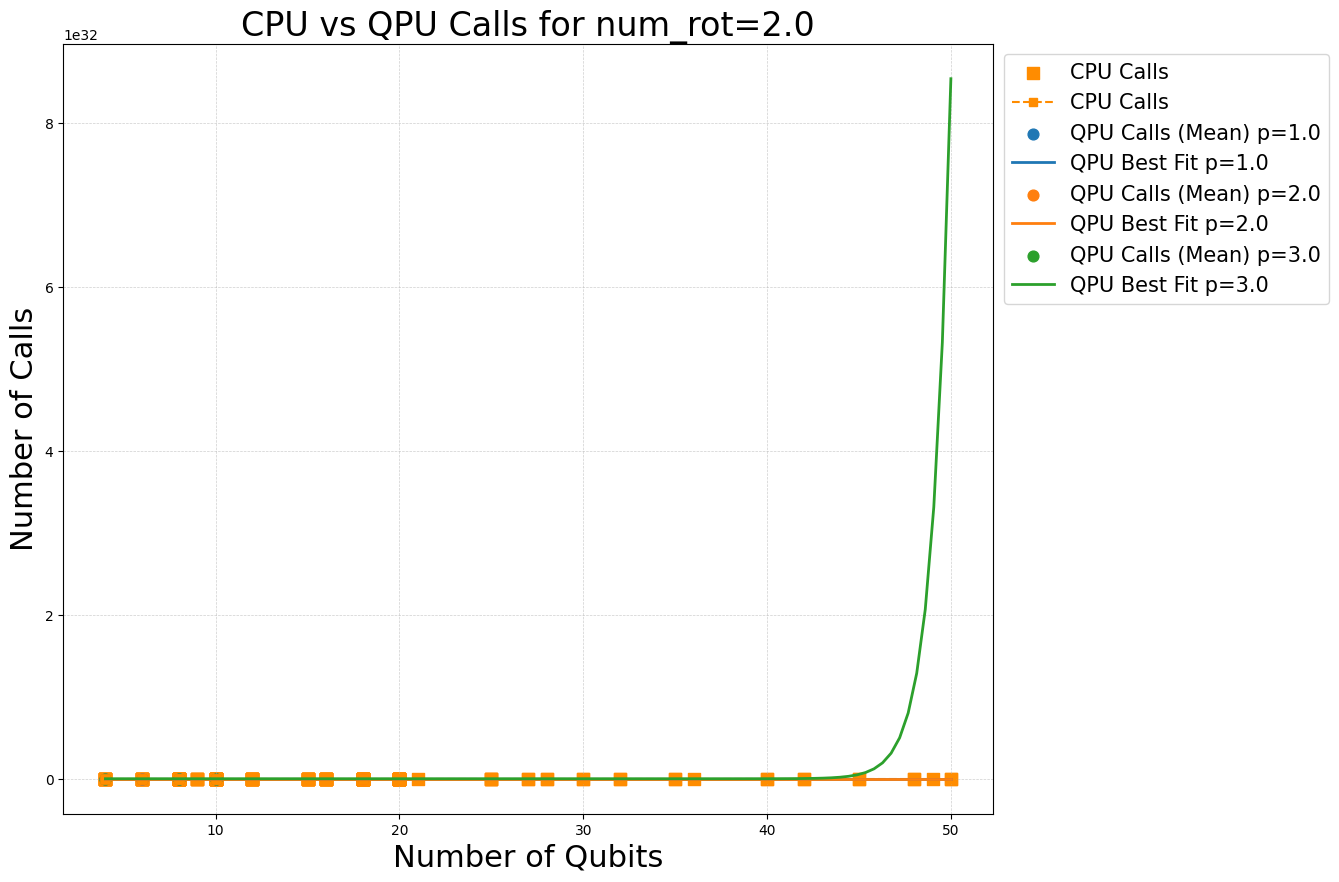

Processing num_rot=3.0, p=1.0: Unique num_qubits values: [ 6  9 12 18]
Processing num_rot=3.0, p=2.0: Unique num_qubits values: [ 6  9 12 15 18]
Processing num_rot=3.0, p=3.0: Unique num_qubits values: [12 18 27]
Processing num_rot=3.0, p=4.0: Unique num_qubits values: [15 18]
Processing num_rot=3.0, p=5.0: Unique num_qubits values: [18]
Processing num_rot=3.0, p=6.0: Unique num_qubits values: [18]
Processing num_rot=3.0, p=7.0: Unique num_qubits values: []


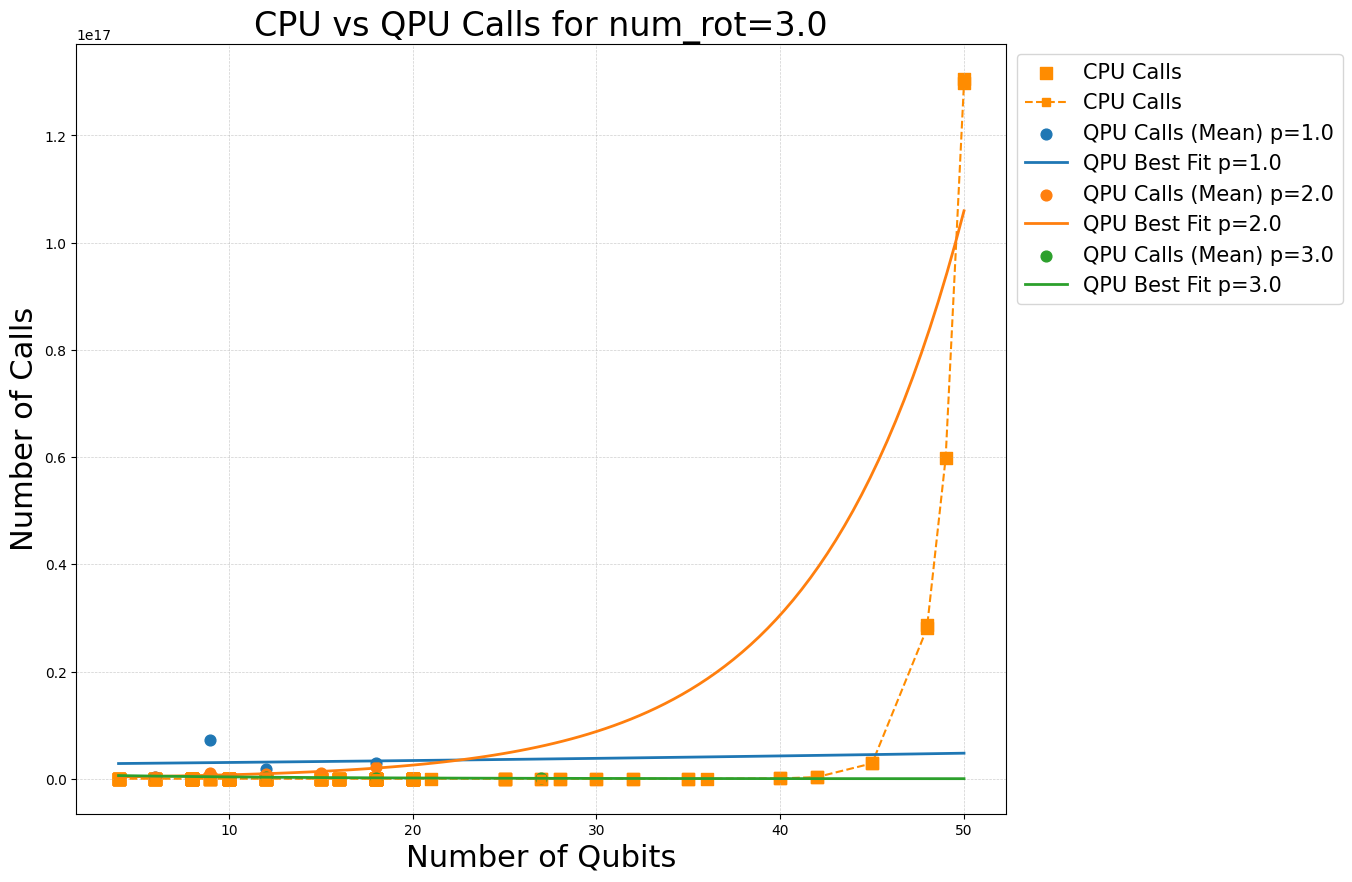

Processing num_rot=4.0, p=1.0: Unique num_qubits values: [8]
Processing num_rot=4.0, p=2.0: Unique num_qubits values: [ 8 16]
Processing num_rot=4.0, p=3.0: Unique num_qubits values: [20 24]
Processing num_rot=4.0, p=4.0: Unique num_qubits values: [24 28]
Processing num_rot=4.0, p=5.0: Unique num_qubits values: [16]
Processing num_rot=4.0, p=6.0: Unique num_qubits values: [24]
Processing num_rot=4.0, p=7.0: Unique num_qubits values: []


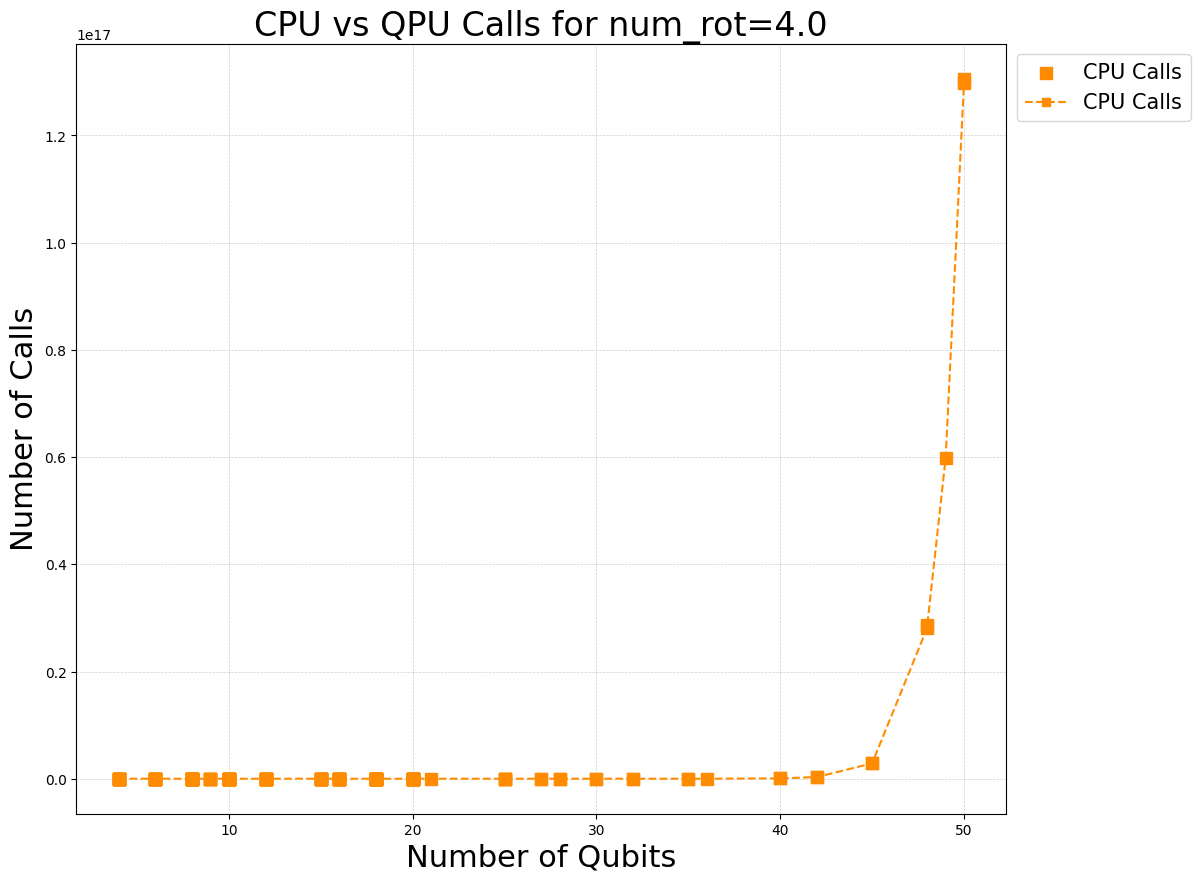

Processing num_rot=5.0, p=1.0: Unique num_qubits values: [10]
Processing num_rot=5.0, p=2.0: Unique num_qubits values: [10]
Processing num_rot=5.0, p=3.0: Unique num_qubits values: []
Processing num_rot=5.0, p=4.0: Unique num_qubits values: [20]
Processing num_rot=5.0, p=5.0: Unique num_qubits values: [20]
Processing num_rot=5.0, p=6.0: Unique num_qubits values: [25]
Processing num_rot=5.0, p=7.0: Unique num_qubits values: [25]


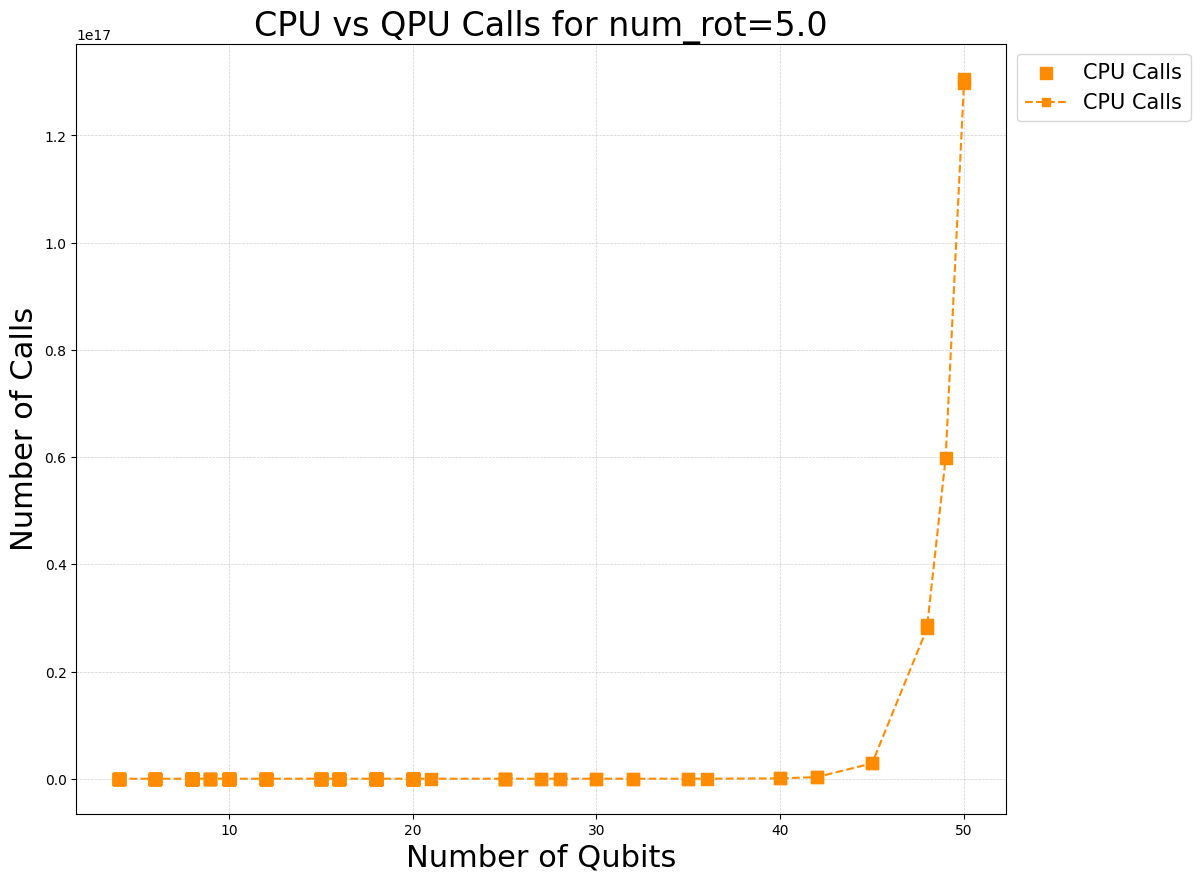

Processing num_rot=6.0, p=1.0: Unique num_qubits values: []
Processing num_rot=6.0, p=2.0: Unique num_qubits values: [18]
Processing num_rot=6.0, p=3.0: Unique num_qubits values: []
Processing num_rot=6.0, p=4.0: Unique num_qubits values: []
Processing num_rot=6.0, p=5.0: Unique num_qubits values: []
Processing num_rot=6.0, p=6.0: Unique num_qubits values: []
Processing num_rot=6.0, p=7.0: Unique num_qubits values: []


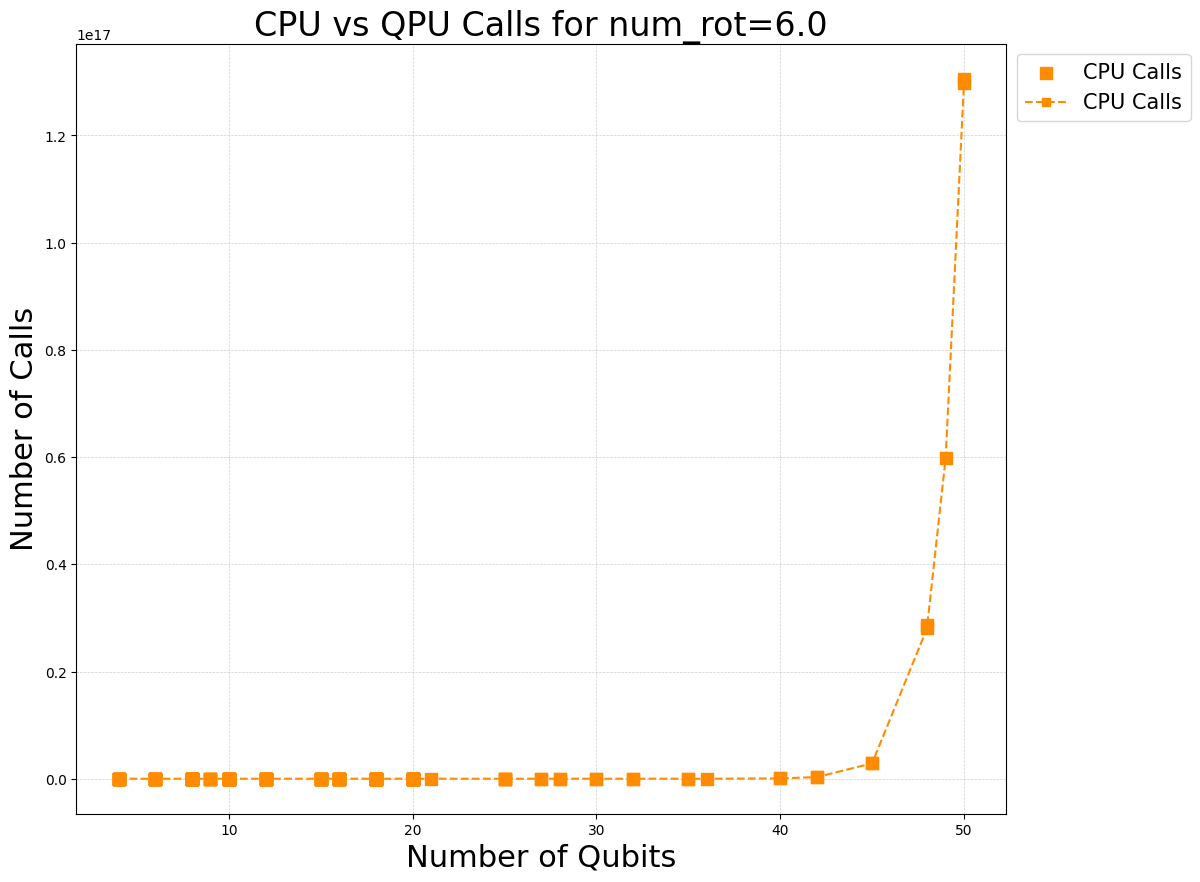

In [302]:
plotter.plot_scaling_per_num_rot_p()

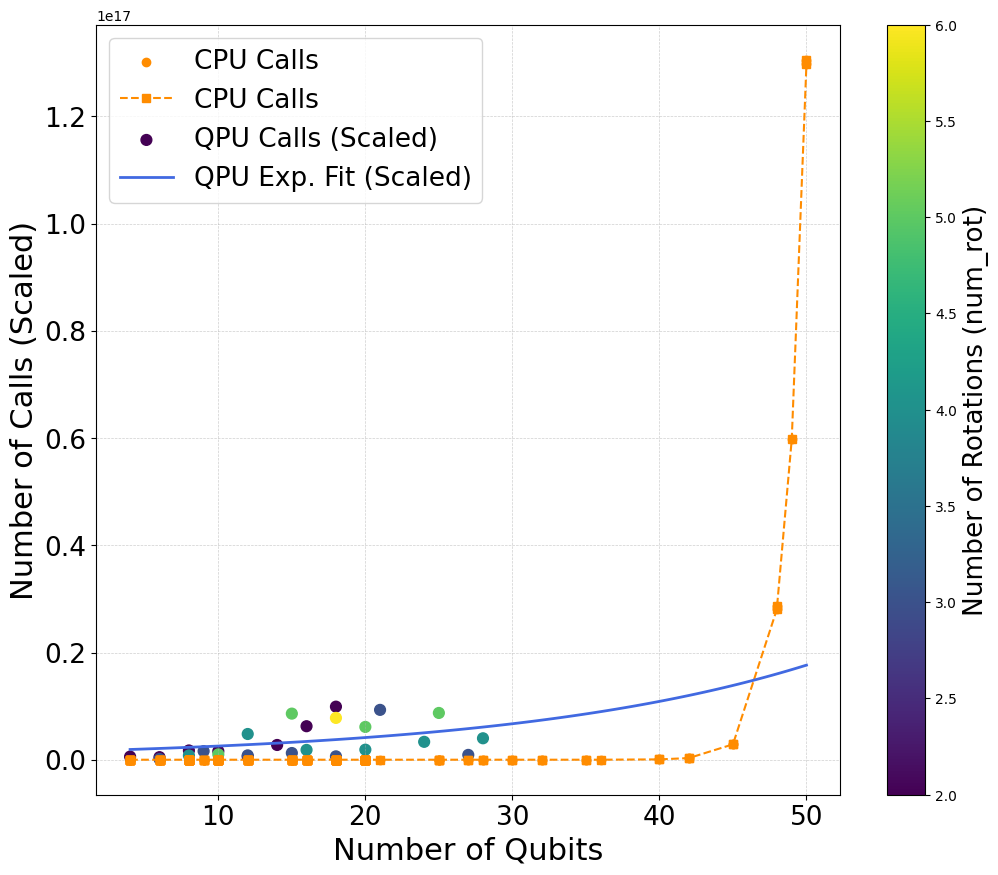

In [307]:
plotter.plot_scaling_num_rot_division()

/Users/aag/Documents/proteinfolding/proteinfolding/plotter_scaling.py:474: OptimizeWarning: Covariance of the parameters could not be estimated
  X_qpu_subset = X_qpu[mask]


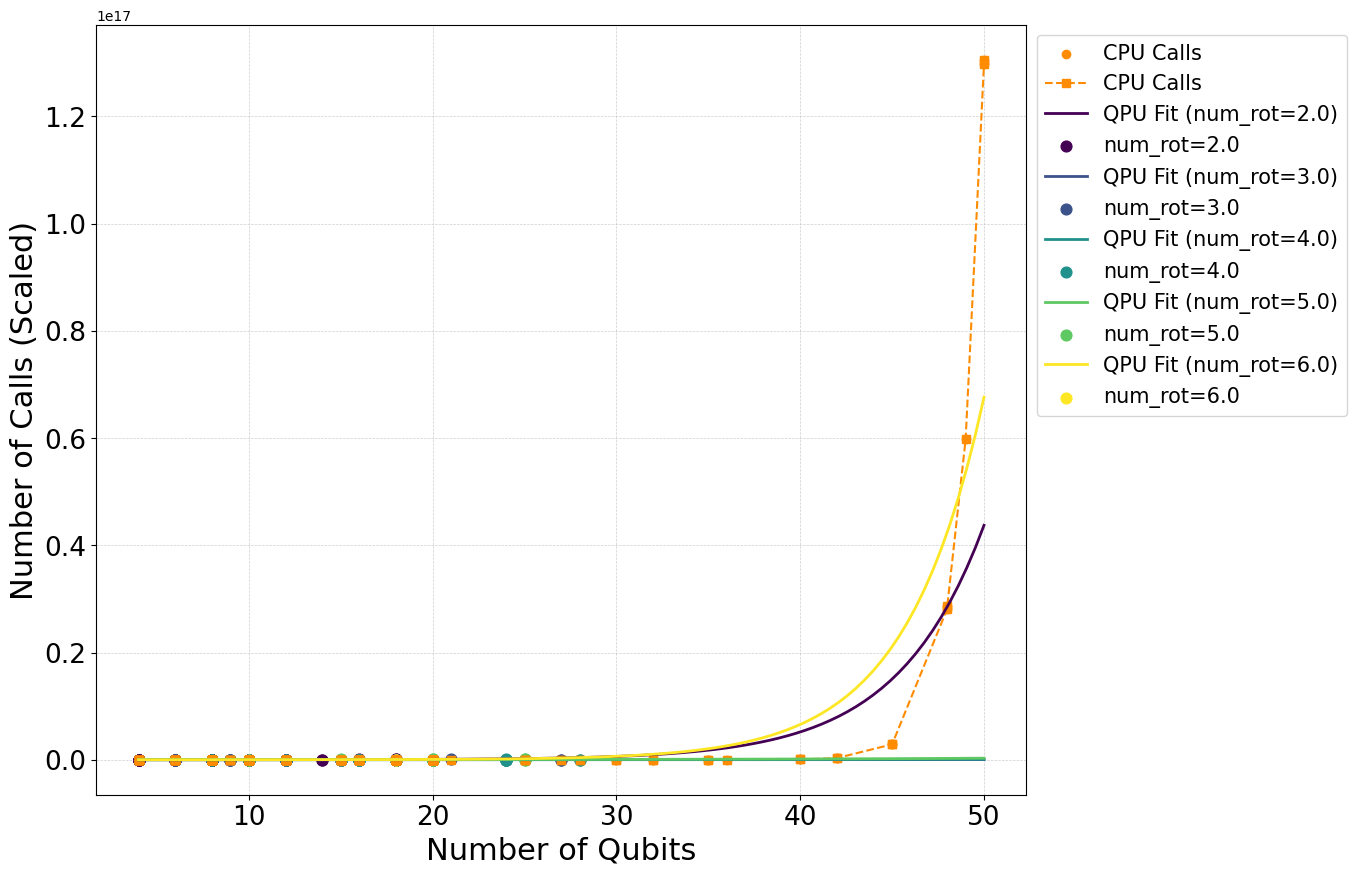

In [312]:
plotter.plot_scaling_all_rotations()

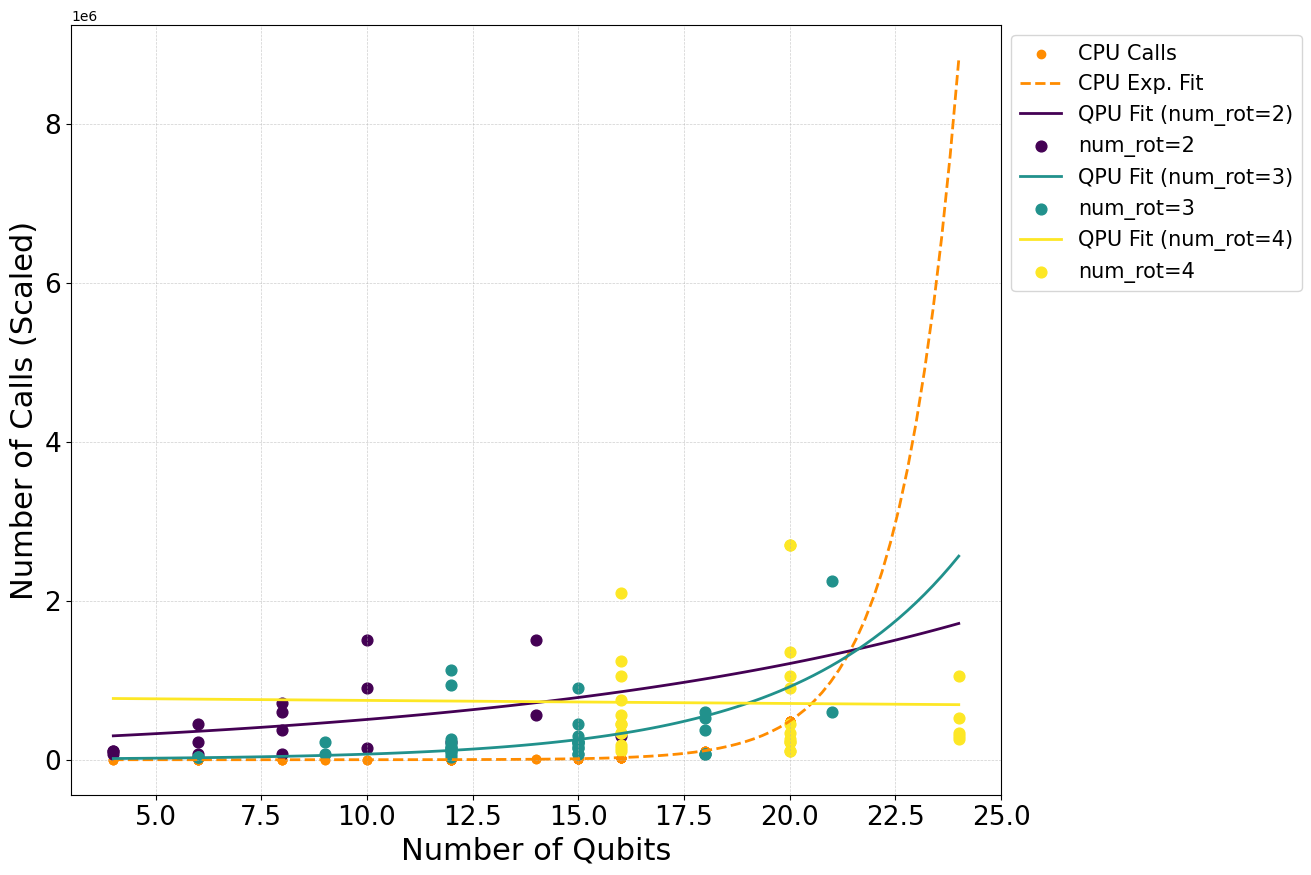

In [ ]:
# by num_rot  - all values
import os
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd

cpu_df = pd.read_csv("complexity_SA.csv")  
qpu_df = pd.read_csv("QPU_calls_cleaned.csv") 

df = pd.merge(cpu_df, qpu_df, on="num_qubits", how="outer", suffixes=('_cpu', '_qpu'))
df_qpu_valid = df[df["qpu_calls"].notna()]  

X = df["num_qubits"].values
y_cpu = df["cpu_calls"].values

X_qpu = df_qpu_valid["num_qubits"].values
y_qpu = df_qpu_valid["qpu_calls"].values
num_rot = df_qpu_valid["num_rot_qpu"].values  

X_cpu = X[y_cpu > 0]
y_cpu = y_cpu[y_cpu > 0]

num_qubits_smooth = np.linspace(X.min(), X.max(), 100)

def exp_fit(x, A, B):
    return A * np.exp(B * x)

popt_cpu, _ = curve_fit(exp_fit, X_cpu, y_cpu, p0=(1, 0.1))
cpu_best_fit = exp_fit(num_qubits_smooth, *popt_cpu)

scaling_factor = 7500
y_qpu_scaled = y_qpu * scaling_factor 

plt.figure(figsize=(12, 10))

plt.scatter(X_cpu, y_cpu, label="CPU Calls", color='darkorange')
plt.plot(num_qubits_smooth, cpu_best_fit, linestyle="--", label="CPU Exp. Fit", 
         color="darkorange", linewidth=2)

unique_rotations = np.unique(num_rot)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_rotations))) 

for i, rot in enumerate(unique_rotations):
    mask = num_rot == rot
    X_qpu_subset = X_qpu[mask]
    y_qpu_subset = y_qpu[mask]
    
    if len(X_qpu_subset) > 1: 
        popt_qpu, _ = curve_fit(exp_fit, X_qpu_subset, y_qpu_subset, p0=(1, 0.1))
        qpu_fit_curve = exp_fit(num_qubits_smooth, *popt_qpu) * scaling_factor

        plt.plot(num_qubits_smooth, qpu_fit_curve, linestyle="-", 
                 label=f"QPU Fit (num_rot={rot})", color=colors[i], linewidth=2)

    plt.scatter(X_qpu_subset, y_qpu_scaled[mask], c=[colors[i]], label=f"num_rot={rot}", s=60)

cbar = plt.colorbar(sc)  
cbar.set_ticks(unique_rotations)  
cbar.set_label("Number of Rotations (num_rot)", fontsize=19)

plt.xlabel("Number of Qubits", fontsize=22)
plt.ylabel("Number of Calls (Scaled)", fontsize=22)
plt.xticks(fontsize=19)
plt.yticks(fontsize=19)
plt.legend(fontsize=15, loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)

plot_path = os.path.join("plots/xy_qaoa/cpu_vs_qpu")
os.makedirs(plot_path, exist_ok=True)
# plt.savefig(os.path.join(plot_path, "cpu_vs_qpu_SA_semi_log_trained.pdf"))
# Save the figure
plt.show()
plt.close()


Index(['num_res_cpu', 'num_rot_cpu', 'num_qubits', 'ground_state', 'cpu_calls',
       'num_res_qpu', 'num_rot_qpu', 'shots', 'p', 'min_iter', 'qpu_calls'],
      dtype='object')


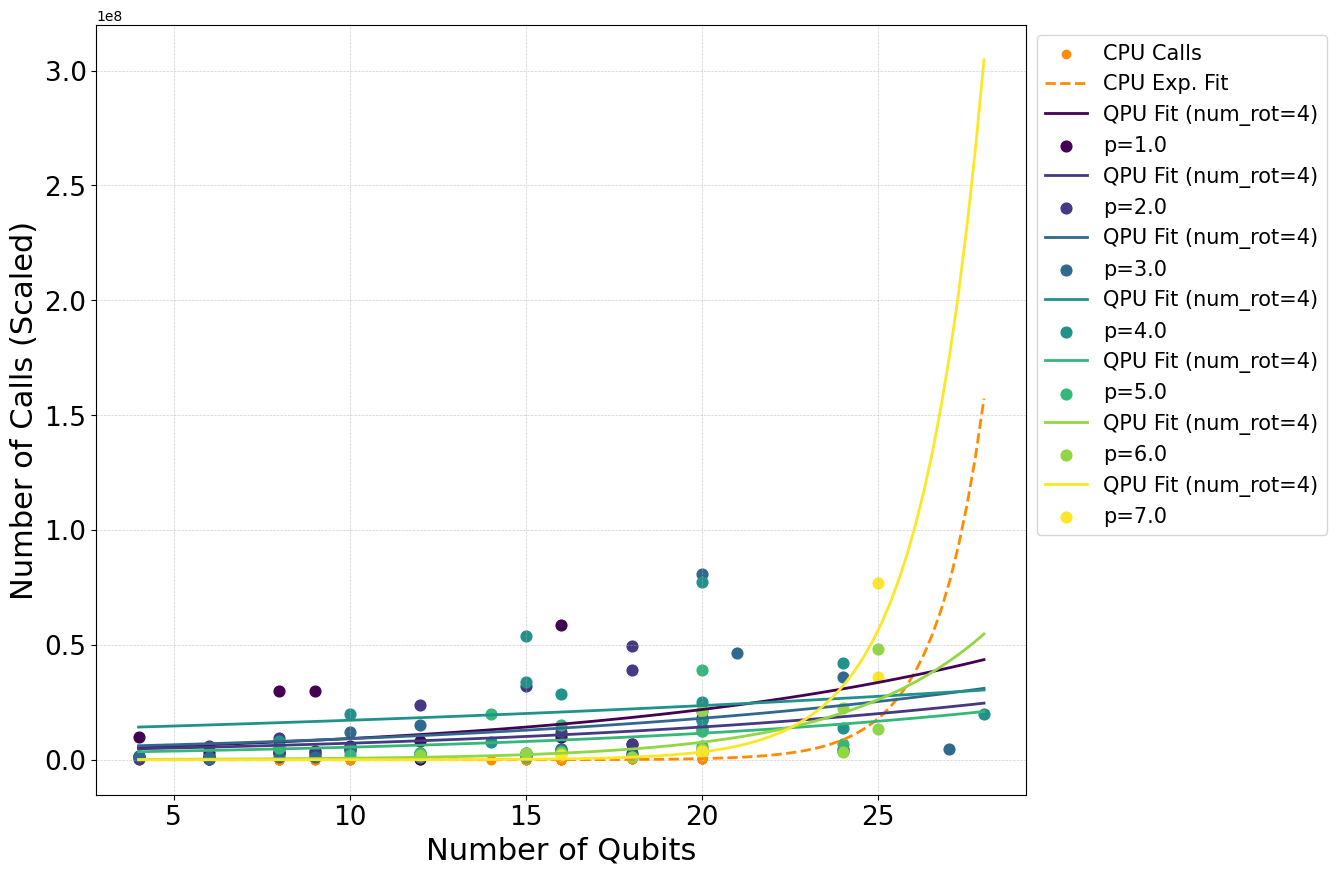

In [118]:
# by p  - all values
import os
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd

cpu_df = pd.read_csv("complexity_SA.csv")  
qpu_df = pd.read_csv("QPU_calls_cleaned.csv") 

df = pd.merge(cpu_df, qpu_df, on="num_qubits", how="outer", suffixes=('_cpu', '_qpu'))
df_qpu_valid = df[df["qpu_calls"].notna()]  
print(df_qpu_valid.columns)

X = df["num_qubits"].values
y_cpu = df["cpu_calls"].values

X_qpu = df_qpu_valid["num_qubits"].values
y_qpu = df_qpu_valid["qpu_calls"].values
p = df_qpu_valid["p"].values  

X_cpu = X[y_cpu > 0]
y_cpu = y_cpu[y_cpu > 0]

num_qubits_smooth = np.linspace(X.min(), X.max(), 100)

def exp_fit(x, A, B):
    return A * np.exp(B * x)

popt_cpu, _ = curve_fit(exp_fit, X_cpu, y_cpu, p0=(1, 0.1))
cpu_best_fit = exp_fit(num_qubits_smooth, *popt_cpu)

scaling_factor = 100000
y_qpu_scaled = y_qpu * scaling_factor 

plt.figure(figsize=(12, 10))

plt.scatter(X_cpu, y_cpu, label="CPU Calls", color='darkorange')
plt.plot(num_qubits_smooth, cpu_best_fit, linestyle="--", label="CPU Exp. Fit", 
         color="darkorange", linewidth=2)

unique_p = np.unique(p)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_p))) 

for i, p_i in enumerate(unique_p):
    mask = p == p_i
    X_qpu_subset = X_qpu[mask]
    y_qpu_subset = y_qpu[mask]
    
    if len(X_qpu_subset) > 1: 
        popt_qpu, _ = curve_fit(exp_fit, X_qpu_subset, y_qpu_subset, p0=(1, 0.1))
        qpu_fit_curve = exp_fit(num_qubits_smooth, *popt_qpu) * scaling_factor

        plt.plot(num_qubits_smooth, qpu_fit_curve, linestyle="-", 
                 label=f"QPU Fit (num_rot={rot})", color=colors[i], linewidth=2)

    plt.scatter(X_qpu_subset, y_qpu_scaled[mask], c=[colors[i]], label=f"p={p_i}", s=60)

cbar = plt.colorbar(sc)  
cbar.set_ticks(unique_rotations)  
cbar.set_label("Number of Rotations (num_rot)", fontsize=19)

plt.xlabel("Number of Qubits", fontsize=22)
plt.ylabel("Number of Calls (Scaled)", fontsize=22)
plt.xticks(fontsize=19)
plt.yticks(fontsize=19)
plt.legend(fontsize=15, loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)

plot_path = os.path.join("plots/xy_qaoa/cpu_vs_qpu")
os.makedirs(plot_path, exist_ok=True)
# plt.savefig(os.path.join(plot_path, "cpu_vs_qpu_SA_semi_log_trained.pdf"))
# Save the figure
plt.show()
plt.close()


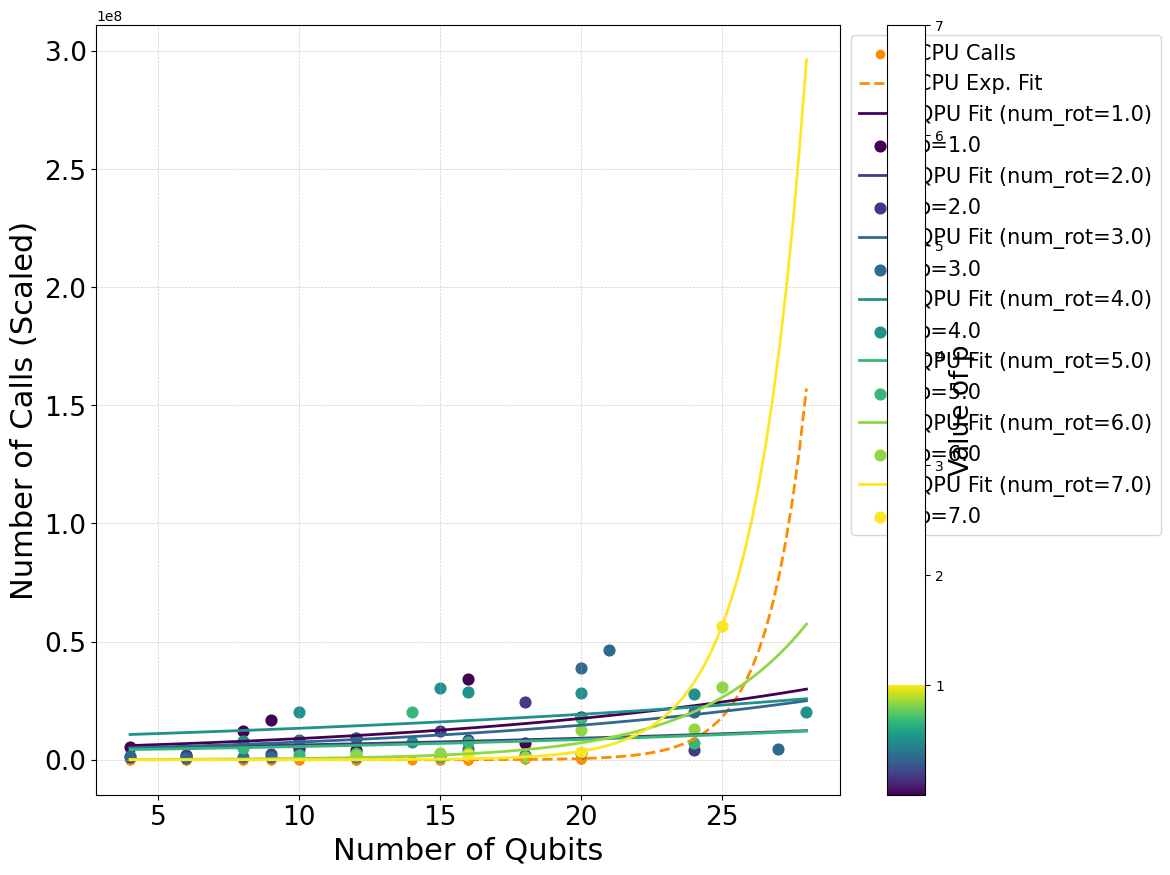

In [123]:
import os
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd

cpu_df = pd.read_csv("complexity_SA.csv")  
qpu_df = pd.read_csv("QPU_calls_cleaned.csv") 

df = pd.merge(cpu_df, qpu_df, on="num_qubits", how="outer", suffixes=('_cpu', '_qpu'))
df_qpu_valid = df[df["qpu_calls"].notna()] 
qpu_stats = df.groupby(["num_qubits", "p"])["qpu_calls"].agg(["mean", "std"]).reset_index()
qpu_stats.rename(columns={"mean": "qpu_mean", "std": "qpu_std"}, inplace=True)

X = df["num_qubits"].values
y_cpu = df["cpu_calls"].values

X_cpu = X[~np.isnan(y_cpu)]
y_cpu = y_cpu[~np.isnan(y_cpu)]

X_qpu = qpu_stats["num_qubits"].values
y_qpu = qpu_stats["qpu_mean"].values
p = qpu_stats["p"].values  

num_qubits_smooth = np.linspace(X.min(), X.max(), 100)

def exp_fit(x, A, B):
    return A * np.exp(B * x)

popt_cpu, _ = curve_fit(exp_fit, X_cpu, y_cpu, p0=(1, 0.1))
cpu_best_fit = exp_fit(num_qubits_smooth, *popt_cpu)

# Scale QPU calls for better visualization
scaling_factor = 100000
y_qpu_scaled = y_qpu * scaling_factor 

plt.figure(figsize=(12, 10))

plt.scatter(X_cpu, y_cpu, label="CPU Calls", color='darkorange')
plt.plot(num_qubits_smooth, cpu_best_fit, linestyle="--", label="CPU Exp. Fit", 
         color="darkorange", linewidth=2)

unique_p = np.unique(p)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_p))) 

for i, p_i in enumerate(unique_p):
    mask = p == p_i
    X_qpu_subset = X_qpu[mask]
    y_qpu_subset = y_qpu[mask]
    
    if len(X_qpu_subset) > 1: 
        popt_qpu, _ = curve_fit(exp_fit, X_qpu_subset, y_qpu_subset, p0=(1, 0.1))
        qpu_fit_curve = exp_fit(num_qubits_smooth, *popt_qpu) * scaling_factor

        plt.plot(num_qubits_smooth, qpu_fit_curve, linestyle="-", 
                 label=f"QPU Fit (num_rot={p_i})", color=colors[i], linewidth=2)

    sc = plt.scatter(X_qpu_subset, y_qpu_scaled[mask], c=[colors[i]], label=f"p={p_i}", s=60)

cbar = plt.colorbar(sc)  
cbar.set_ticks(unique_p)  
cbar.set_label("Value of p", fontsize=19)

plt.xlabel("Number of Qubits", fontsize=22)
plt.ylabel("Number of Calls (Scaled)", fontsize=22)
plt.xticks(fontsize=19)
plt.yticks(fontsize=19)
plt.legend(fontsize=15, loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)

plot_path = os.path.join("plots/xy_qaoa/cpu_vs_qpu")
os.makedirs(plot_path, exist_ok=True)
# plt.savefig(os.path.join(plot_path, "cpu_vs_qpu_SA_semi_log_trained.pdf"))

plt.show()
plt.close()
